In [ ]:
'''
THE FOLLOWING CODE HAS BEEN IMPLEMENTED FOLLOWING THE GUIDENCE OF THE SESSION TUTORIALS
DEPICTING CREATIVE APPLICATIONS OF DEEPLEARNING WITH TENSORFLOW AS PUBLISHED BY KADENZE

LINK:
https://www.kadenze.com/courses/creative-applications-of-deep-learning-with-tensorflow-iv/info

Creative Applications of Deep Learning w/ Tensorflow.
Kadenze, Inc.
Parag K. Mital

Copyright Parag K. Mital, June 2016.

'''

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import IPython.display as ipyd
from libs import gif, nb_utils

/Users/gabrielshannon/miniconda3/envs/env/lib/python3.6/site-packages/matplotlib/__init__.py:1003: UserWarning: Duplicate key in file "/Users/gabrielshannon/.matplotlib/matplotlibrc", line #2
  (fname, cnt))


In [2]:
from IPython.core.display import HTML
HTML("""<style> .rendered_html code { 
    padding: 2px 4px;
    color: #c7254e;
    background-color: #f9f2f4;
    border-radius: 4px;
} </style>""")

In [3]:
sess = tf.InteractiveSession()

In [4]:
from libs import inception
net = inception.get_inception_model()

In [5]:
nb_utils.show_graph(net['graph_def'])

In [6]:
tf.import_graph_def(net['graph_def'], name='inception')

In [7]:
net['labels']

[(0, 'dummy'),
 (1, 'kit fox'),
 (2, 'English setter'),
 (3, 'Siberian husky'),
 (4, 'Australian terrier'),
 (5, 'English springer'),
 (6, 'grey whale'),
 (7, 'lesser panda'),
 (8, 'Egyptian cat'),
 (9, 'ibex'),
 (10, 'Persian cat'),
 (11, 'cougar'),
 (12, 'gazelle'),
 (13, 'porcupine'),
 (14, 'sea lion'),
 (15, 'malamute'),
 (16, 'badger'),
 (17, 'Great Dane'),
 (18, 'Walker hound'),
 (19, 'Welsh springer spaniel'),
 (20, 'whippet'),
 (21, 'Scottish deerhound'),
 (22, 'killer whale'),
 (23, 'mink'),
 (24, 'African elephant'),
 (25, 'Weimaraner'),
 (26, 'soft-coated wheaten terrier'),
 (27, 'Dandie Dinmont'),
 (28, 'red wolf'),
 (29, 'Old English sheepdog'),
 (30, 'jaguar'),
 (31, 'otterhound'),
 (32, 'bloodhound'),
 (33, 'Airedale'),
 (34, 'hyena'),
 (35, 'meerkat'),
 (36, 'giant schnauzer'),
 (37, 'titi'),
 (38, 'three-toed sloth'),
 (39, 'sorrel'),
 (40, 'black-footed ferret'),
 (41, 'dalmatian'),
 (42, 'black-and-tan coonhound'),
 (43, 'papillon'),
 (44, 'skunk'),
 (45, 'Staffordsh

In [8]:
g = tf.get_default_graph()
names = [op.name for op in g.get_operations()]
print(names)

['inception/input', 'inception/conv2d0_w', 'inception/conv2d0_b', 'inception/conv2d1_w', 'inception/conv2d1_b', 'inception/conv2d2_w', 'inception/conv2d2_b', 'inception/mixed3a_1x1_w', 'inception/mixed3a_1x1_b', 'inception/mixed3a_3x3_bottleneck_w', 'inception/mixed3a_3x3_bottleneck_b', 'inception/mixed3a_3x3_w', 'inception/mixed3a_3x3_b', 'inception/mixed3a_5x5_bottleneck_w', 'inception/mixed3a_5x5_bottleneck_b', 'inception/mixed3a_5x5_w', 'inception/mixed3a_5x5_b', 'inception/mixed3a_pool_reduce_w', 'inception/mixed3a_pool_reduce_b', 'inception/mixed3b_1x1_w', 'inception/mixed3b_1x1_b', 'inception/mixed3b_3x3_bottleneck_w', 'inception/mixed3b_3x3_bottleneck_b', 'inception/mixed3b_3x3_w', 'inception/mixed3b_3x3_b', 'inception/mixed3b_5x5_bottleneck_w', 'inception/mixed3b_5x5_bottleneck_b', 'inception/mixed3b_5x5_w', 'inception/mixed3b_5x5_b', 'inception/mixed3b_pool_reduce_w', 'inception/mixed3b_pool_reduce_b', 'inception/mixed4a_1x1_w', 'inception/mixed4a_1x1_b', 'inception/mixed4a_3

In [9]:
input_name = names[0] + ':0'
x = g.get_tensor_by_name(input_name)

In [10]:
softmax = g.get_tensor_by_name(names[-1] + ':0')

0 255


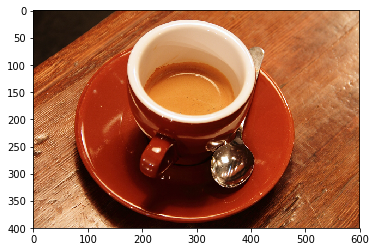

In [11]:
from skimage.data import coffee
og = coffee()
plt.imshow(og)
print(og.min(), og.max())

In [12]:
img = inception.preprocess(og)
print(og.shape), print(img.shape)

(400, 600, 3)
(299, 299, 3)


(None, None)

In [13]:
print(img.min(), img.max())

-117.0 136.0


In [14]:
img_4d = img[np.newaxis]
print(img_4d.shape)

(1, 299, 299, 3)


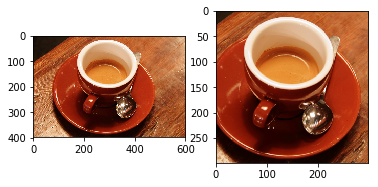

In [15]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(og)
axs[1].imshow(inception.deprocess(img))

In [16]:
res = np.squeeze(softmax.eval(feed_dict={x: img_4d}))

In [17]:
res.shape

(16, 1008)

In [18]:
res = np.mean(res, 0)
res = res / np.sum(res)

In [19]:
print([(res[idx], net['labels'][idx])
       for idx in res.argsort()[-5:][::-1]])

[(0.99833834, (947, 'espresso')), (0.00062216405, (859, 'cup')), (0.00053180306, (953, 'chocolate sauce')), (0.00031610427, (844, 'consomme')), (0.00013780761, (822, 'soup bowl'))]


In [20]:
W = g.get_tensor_by_name('inception/conv2d0_w:0')
W_eval = W.eval()
print(W_eval.shape)

(7, 7, 3, 64)


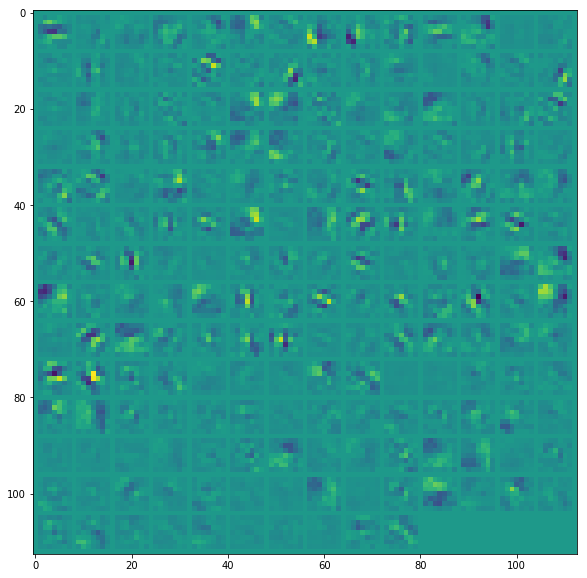

In [21]:
from libs import utils
W_montage = utils.montage_filters(W_eval)
plt.figure(figsize=(10,10))
plt.imshow(W_montage, interpolation='nearest')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


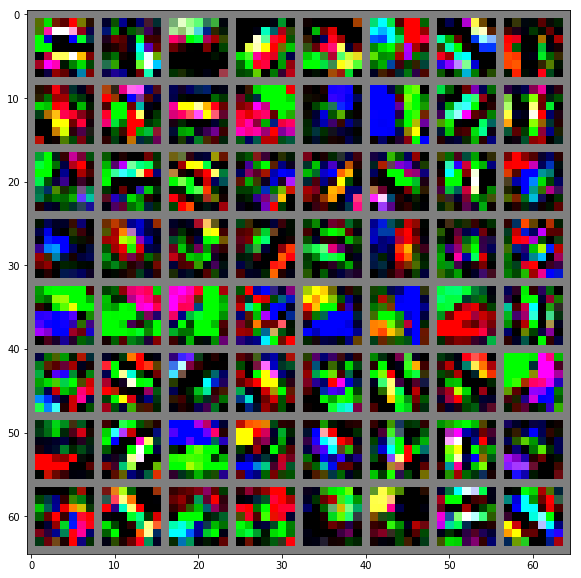

In [22]:
Ws = [utils.montage_filters(W_eval[:, :, [i], :]) for i in range(3)]
Ws = np.rollaxis(np.array(Ws), 0, 3)
plt.figure(figsize=(10,10))
plt.imshow(Ws, interpolation='nearest')

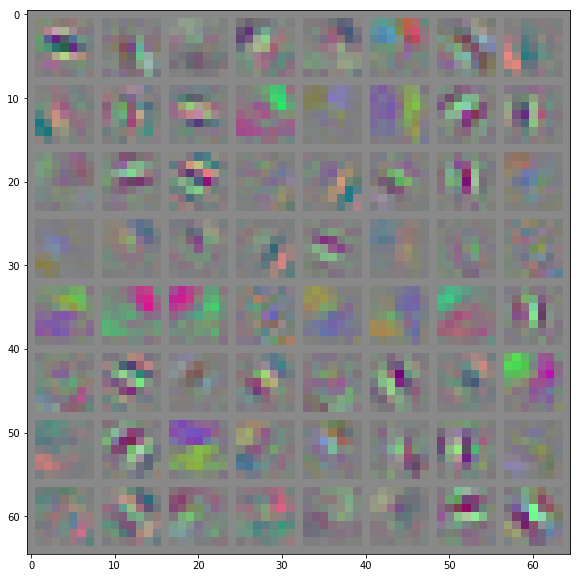

In [23]:
np.min(Ws), np.max(Ws)
Ws = (Ws / np.max(np.abs(Ws)) * 128 + 128).astype(np.uint8)
plt.figure(figsize=(10,10))
plt.imshow(Ws, interpolation='nearest')

In [24]:
feature = g.get_tensor_by_name('inception/conv2d0_pre_relu:0')

In [25]:
layer_shape = tf.shape(feature).eval(feed_dict={x:img_4d})
print(layer_shape)

[  1 150 150  64]


Text(0.5, 1.0, 'Convolution Outputs')

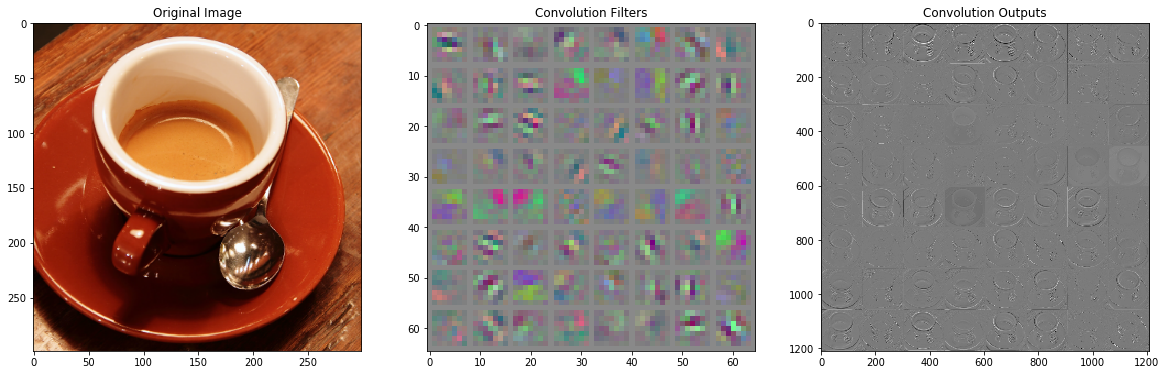

In [26]:
f = feature.eval(feed_dict={x: img_4d})
montage = utils.montage_filters(np.rollaxis(np.expand_dims(f[0], 3), 3, 2))
fig, axs = plt.subplots(1, 3, figsize=(20, 10))
axs[0].imshow(inception.deprocess(img))
axs[0].set_title('Original Image')
axs[1].imshow(Ws, interpolation='nearest')
axs[1].set_title('Convolution Filters')
axs[2].imshow(montage, cmap='gray')
axs[2].set_title('Convolution Outputs')

In [27]:
feature = g.get_tensor_by_name('inception/conv2d0_pre_relu:0')
gradient = tf.gradients(tf.reduce_max(feature, 3), x)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [28]:
res = sess.run(gradient, feed_dict={x: img_4d})[0]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


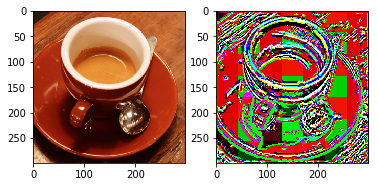

In [29]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(inception.deprocess(img))
axs[1].imshow(res[0])

In [30]:
def normalize(img, s=0.1):
    '''Normalize the image range for visualization'''
    z = img / np.std(img)
    return np.uint8(np.clip(
        (z - z.mean()) / max(z.std(), 1e-4) * s + 0.5,
        0, 1) * 255)

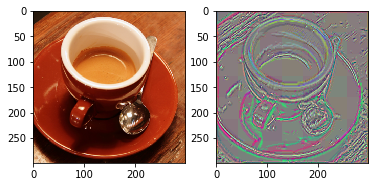

In [31]:
r = normalize(res)
fig, axs = plt.subplots(1, 2)
axs[0].imshow(inception.deprocess(img))
axs[1].imshow(r[0])

In [32]:
def compute_gradient(input_placeholder, img, layer_name, neuron_i):
    feature = g.get_tensor_by_name(layer_name)
    gradient = tf.gradients(tf.reduce_mean(feature[:, :, :, neuron_i]), x)
    res = sess.run(gradient, feed_dict={input_placeholder: img})[0]
    return res

def compute_gradients(input_placeholder, img, layer_name):
    feature = g.get_tensor_by_name(layer_name)
    layer_shape = tf.shape(feature).eval(feed_dict={input_placeholder: img})
    gradients = []
    for neuron_i in range(layer_shape[-1]):
        gradients.append(compute_gradient(input_placeholder, img, layer_name, neuron_i))
    return gradients

In [33]:
gradients = compute_gradients(x, img_4d, 'inception/conv2d1_pre_relu:0')
gradients_norm = [normalize(gradient_i[0]) for gradient_i in gradients]
montage = utils.montage(np.array(gradients_norm))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


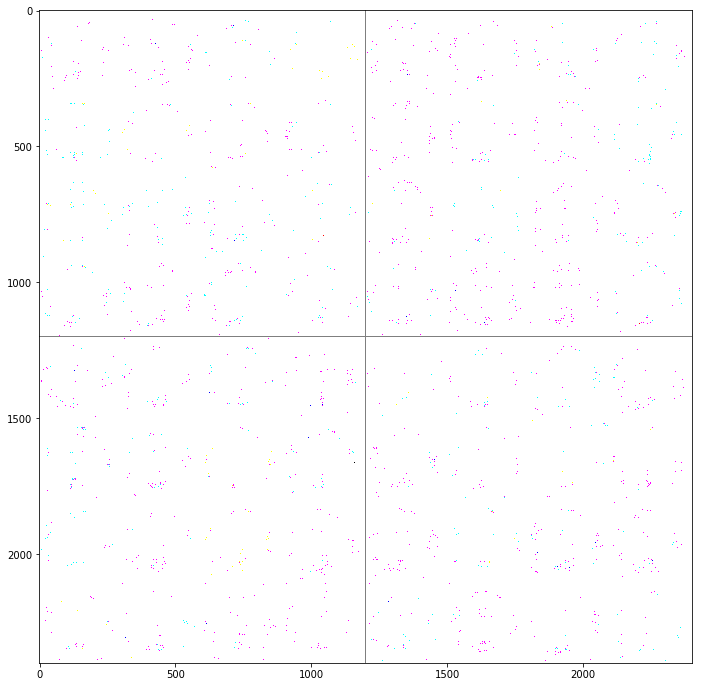

In [34]:
plt.figure(figsize=(12, 12))
plt.imshow(montage)

In [35]:
features = [name for name in names if 'maxpool' in name.split('/')[-1]]
print(features)

['inception/maxpool0', 'inception/maxpool1', 'inception/maxpool4', 'inception/maxpool10']


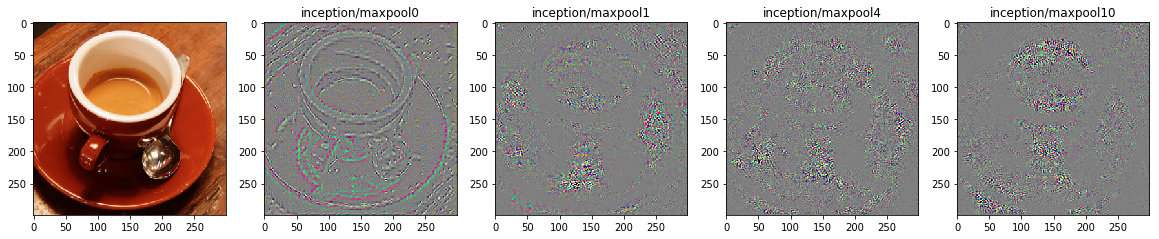

In [36]:
n_plots = len(features) + 1
fig, axs = plt.subplots(1, n_plots, figsize=(20, 5))
base = img_4d
axs[0].imshow(inception.deprocess(img))
for feature_i, featurename in enumerate(features):
    feature = g.get_tensor_by_name(featurename + ':0')
    neuron = tf.reduce_max(feature, len(feature.get_shape())-1)
    gradient = tf.gradients(tf.reduce_sum(neuron), x)
    this_res = sess.run(gradient[0], feed_dict={x: base})[0]
    axs[feature_i+1].imshow(normalize(this_res))
    axs[feature_i+1].set_title(featurename)

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 

MovieWriter imagemagick unavailable. Trying to use pillow instead.


49, 

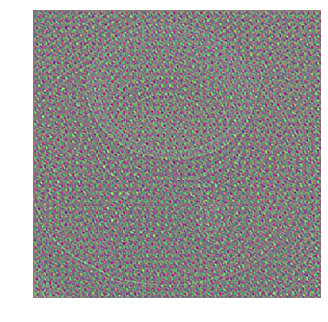

In [37]:
# Rescale to 0-1 range
img_4d = img_4d / np.max(img_4d)

# Get the max pool layer
layer = g.get_tensor_by_name('inception/maxpool0:0')

# Find the gradient of this layer's mean activation with respect to the input image
gradient = tf.gradients(tf.reduce_mean(layer), x)

# Copy the input image as we'll add the gradient to it in a loop
img_copy = img_4d.copy()

# We'll run it for 50 iterations
n_iterations = 50

# Think of this as our learning rate.  This is how much of the gradient we'll add to the input image
step = 1.0

# Every 10 iterations, we'll add an image to a GIF
gif_step = 10

# Storage for our GIF
imgs = []
for it_i in range(n_iterations):
    print(it_i, end=', ')

    # This will calculate the gradient of the layer we chose with respect to the input image.
    this_res = sess.run(gradient[0], feed_dict={x: img_copy})[0]

    # Let's normalize it by the maximum activation
    this_res /= (np.max(np.abs(this_res)) + 1e-8)

    # Then add it to the input image
    img_copy += this_res * step

    # And add to our gif
    if it_i % gif_step == 0:
        imgs.append(normalize(img_copy[0]))

# Build the gif
gif.build_gif(imgs, saveto='1-simplest-mean-layer.gif')

In [38]:
ipyd.Image(url='1-simplest-mean-layer.gif', height=200, width=200)

In [39]:
# Find the maximal neuron in a layer
neuron = tf.reduce_max(layer, len(layer.get_shape())-1)
# Then find the mean over this neuron
gradient = tf.gradients(tf.reduce_mean(neuron), x)

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 

MovieWriter imagemagick unavailable. Trying to use pillow instead.


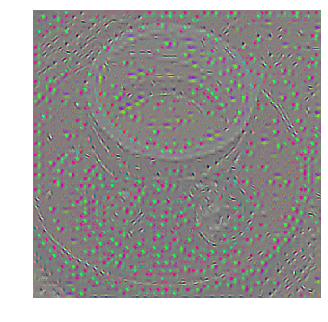

In [40]:
img_copy = img_4d.copy()
imgs = []
for it_i in range(n_iterations):
    print(it_i, end=', ')
    this_res = sess.run(gradient[0], feed_dict={x: img_copy})[0]
    this_res /= (np.max(np.abs(this_res)) + 1e-8)
    img_copy += this_res * step
    if it_i % gif_step == 0:
        imgs.append(normalize(img_copy[0]))
gif.build_gif(imgs, saveto='1-simplest-max-neuron.gif')

In [41]:
ipyd.Image(url='1-simplest-max-neuron.gif', height=200, width=200)

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 

MovieWriter imagemagick unavailable. Trying to use pillow instead.


0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 

MovieWriter imagemagick unavailable. Trying to use pillow instead.


0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 

MovieWriter imagemagick unavailable. Trying to use pillow instead.


0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 

MovieWriter imagemagick unavailable. Trying to use pillow instead.


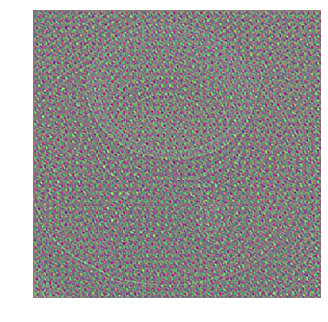

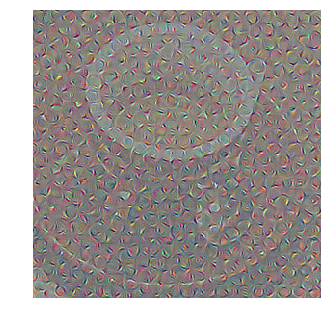

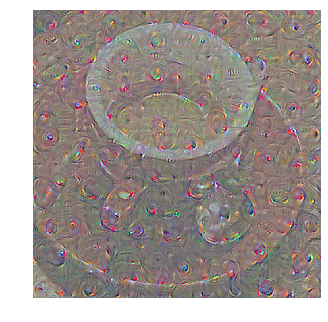

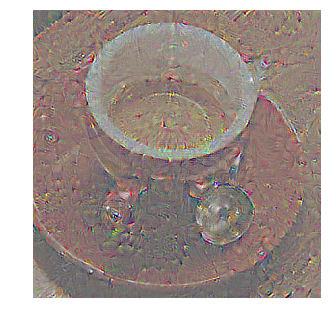

In [42]:
# For each max pooling feature, we'll produce a GIF
for feature_i in features:
    layer = g.get_tensor_by_name(feature_i + ':0')
    gradient = tf.gradients(tf.reduce_mean(layer), x)
    img_copy = img_4d.copy()
    imgs = []
    for it_i in range(n_iterations):
        print(it_i, end=', ')
        this_res = sess.run(gradient[0], feed_dict={x: img_copy})[0]
        this_res /= (np.max(np.abs(this_res)) + 1e-8)
        img_copy += this_res * step
        if it_i % gif_step == 0:
            imgs.append(normalize(img_copy[0]))
    gif.build_gif(
        imgs, saveto='1-simplest-' + feature_i.split('/')[-1] + '.gif')